In [1]:
%config Completer.use_jedi = False
showOriginalModelString = True
from scipy.optimize import differential_evolution
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
from MSC_osteogenesis import *
##/ post processing and plotting //##
class Plot:
    def __init__(self,study,observations):
        self.graph_size = [10,12]
        self.targets = observations[study]['measurement_scheme']
        self.bar_width = .2
        self.error_bar_width = .2
        self.colors = ['lime' , 'violet', 'yellowgreen', 'peru', 'skyblue']
        self.legend_font_size = 30
        self.tick_font_size = 30
        self.title_font_size = 30
        self.delta = .1 # gap between exp and sim
        self.study = study
        self.observations = observations 
    def plot(self):
        ##/ run the simulation
        with open('inferred_params.json') as file:
            inferred_params = json.load(file)
        # inferred_params['a_late_diff_u'] = 20
        obj = MSC_model(params = inferred_params)
        simulation_results = obj.simulate_studies()
        ##/ sort out based on the targets
        exp_target_results,sim_target_results = self.sort(simulation_results[self.study])
        x_exp,x_sim = self.bar_positions(simulation_results[self.study])
        ##/ plot for each target
        target_n = len(self.targets)
        fig = plt.figure(figsize=(self.graph_size[0],self.graph_size[1]))
        fig.canvas.draw()
        fig.tight_layout()
        for target,ii in zip(self.targets,range(target_n)):
            ax = fig.add_subplot(target_n,1,ii+1)
            ax.bar(x=x_sim,height=sim_target_results[target],width = self.bar_width, label = "Sim", 
                    facecolor = self.colors[0],
                     edgecolor="black", yerr =  0,
                     error_kw = dict(capsize= self.error_bar_width))
            ax.bar(x=x_exp,height=[exp_target_results[target][i]['mean'] for i in range(len(exp_target_results[target]))],width = self.bar_width, label = 'Exp', 
                    facecolor = self.colors[1],
                     edgecolor="black", yerr =  0,
                     error_kw = dict(capsize= self.error_bar_width))
            
            ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=2,prop={ 'family':'Times New Roman','size':self.legend_font_size},ncol=1)
        #     ax.set_ylim(yrange)
            x_labels = [item.get_text() for item in ax.get_xticklabels()]
            ax.set_xticks(ticks = [int(i) for i in range(len(self.observations[self.study]['IDs']))])
            ax.set_xticklabels(self.adjust_x_label(self.observations[self.study]['IDs']))
        #     ax.get_yaxis().set_major_formatter(
        #         matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000, ',')))
            for label in (ax.get_xticklabels() + ax.get_yticklabels()):
                label.set_fontname('Times New Roman')
                label.set_fontsize(self.tick_font_size)
#             ax.set_ylabel('yaxis_title',fontdict ={'family':'Times New Roman','size':self.title_font_size})
#             ax.set_xlabel('Days',fontdict ={'family':'Times New Roman','size':self.title_font_size})

            ax.set_title(target,fontdict ={'family':'Times New Roman','size':self.title_font_size, 'fontweight':'bold'})
            plt.savefig(self.study+'.svg',bbox_inches='tight')

    def sort(self,sim_results):
        exp_target_results = {}
        for target in self.targets:
            exp_target_results[target] = []
        for target in self.targets:
            for ID in self.observations[self.study]['IDs']:
                ID_observations = self.observations[self.study][ID]['expectations']
                exp_target_results[target].append(ID_observations[target])
        sim_target_results = {}
        for target in self.targets:
            sim_target_results[target] = []
        for target in self.targets:
            for ID,ID_result in sim_results.items():
                sim_target_results[target].append(ID_result[target])
        return exp_target_results,sim_target_results
    def bar_positions(self,sim_results):
        for i in range(len(self.targets)):
            x_exp =[float(j) + self.delta for j in range(len(sim_results.keys()))]
            x_sim =[float(j) - self.delta for j in range(len(sim_results.keys()))]
        return x_exp,x_sim

    def adjust_x_label(self,labels):
        adj_labels = []
        for label in labels:
            if label == 'ctr':
                adj_labels.append('0')
            elif label == 'IL10_.01':
                adj_labels.append('0.01')
            elif label == 'IL10_.1':
                adj_labels.append('0.1')
            elif label == 'IL10_1':
                adj_labels.append('1')
            elif label == 'IL10_10':
                adj_labels.append('10')
            elif label == 'IL10_100':
                adj_labels.append('100')
            else:
                raise('not defined')
        return adj_labels


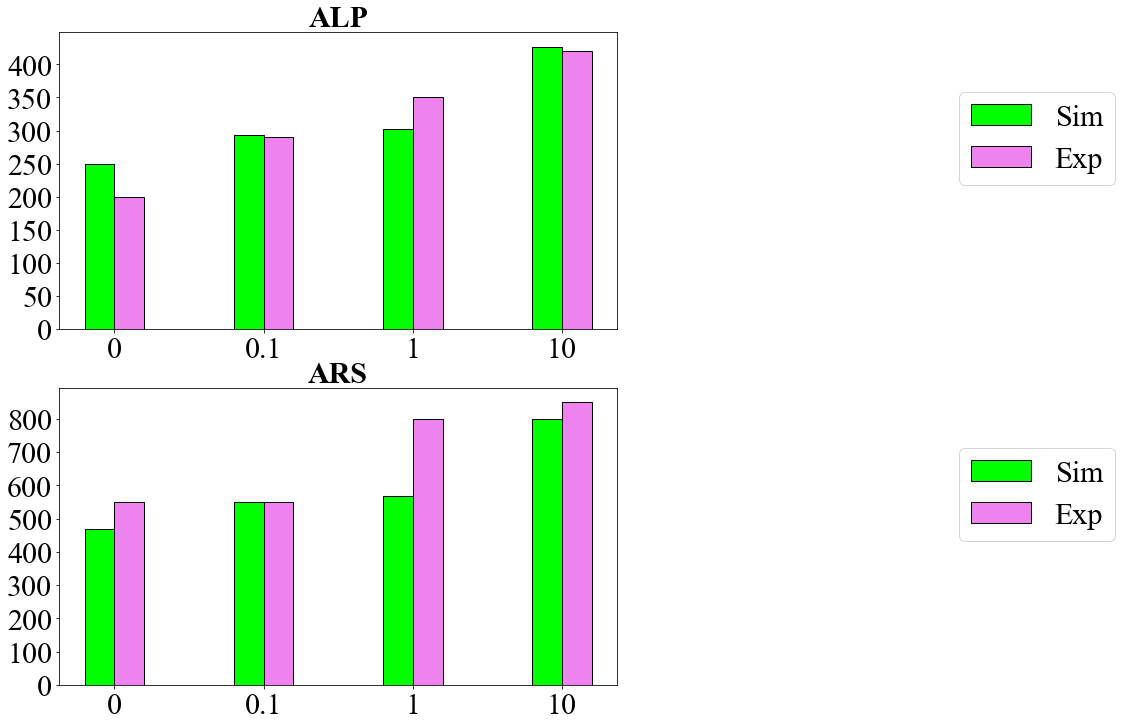

In [3]:
##/ calibrate
# calib_obj = Calibrate(free_params)
# calib_obj.optimize()

##/ run test simultions and plot
study = 'Valles_2020_part1'
# study = 'Chen_2018'
from observations import observations
plot_obj = Plot(study,observations)
plot_obj.plot()